# Hierarchical Clustering

In [1]:
import pandas as pd
import numpy as np
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [2]:
rfm = pd.read_csv('rfm.csv')
rfm_std = pd.read_csv('rfm_std.csv')


In [3]:
rfm_std.head()

Unnamed: 0   Recency  Frequency  Monetary  Cluster
0           0  1.409894  -2.438202  3.707716        0
1           1 -2.146498   1.188986  1.414903        3
2           2  0.383971  -0.211465  0.720024        0
3           3 -0.574674   0.461819  0.702287        0
4           4  1.374758  -0.673554 -0.614514        2

In [4]:
# Dropping the index columns
rfm_std = rfm_std.drop(['Unnamed: 0', 'Cluster'], axis=1)
rfm_std.head()

Recency  Frequency  Monetary
0  1.409894  -2.438202  3.707716
1 -2.146498   1.188986  1.414903
2  0.383971  -0.211465  0.720024
3 -0.574674   0.461819  0.702287
4  1.374758  -0.673554 -0.614514

Using standardized data, I will perform hierarchical clustering using Euclidean distance to compute the primary distance in the hierarchical method, which is the distance between observations. For a little refresher, hierarchical clustering is part of the agglomerative approach because it starts with each observation in its own cluster and then joins neighboring observations/clusters according to their distance until all observations are linked.

In the code below, I passed the data to the linkage() function, which produces a linkage matrix. I also used the 'Ward' method to minimize the total variance within clusters.

Furthermore, the output below is a hierarchical dendrogram, which shows how the data is clustered. The height indicates the dissimilarity between elements. The lower we move down the tree, the higher the similarity between groups/observations.

In [5]:
linkages = hierarchy.linkage(rfm_std, method = 'ward')
hierarchy.dendrogram(linkages)
plt.show()

here's a truncated tree, to close up way to see several observations, and how it clustered by the tree brances.

In [6]:
# show truncated tree
hierarchy.dendrogram(linkages, orientation= 'top', 
                     truncate_mode = 'lastp', p = 10)
plt.show()

To see how well our tree clustering the observations, we can use cophenetic
correlation coefficient (CPCC). This coefficient could be interepreted the same as Pearson's r. In this case, the CPCC is arounf 0.51 indicating moderate fit.

In [7]:
hierarchy.cophenet(linkages, pdist(rfm_std))[0]

0.5148899891133092

Here I am going to check the number of customers grouped in each cluster.

In [8]:
labels = hierarchy.fcluster(linkages, t=4, criterion='maxclust')
list(zip(*np.unique(labels, return_counts=True)))

[(1, 721), (2, 1339), (3, 1373), (4, 905)]

In [9]:
rfm_std

Recency  Frequency  Monetary
0     1.409894  -2.438202  3.707716
1    -2.146498   1.188986  1.414903
2     0.383971  -0.211465  0.720024
3    -0.574674   0.461819  0.702287
4     1.374758  -0.673554 -0.614514
...        ...        ...       ...
4333  1.298690  -1.069075 -1.102093
4334  0.999081  -1.324833 -1.735717
4335 -1.178605  -0.934910 -1.113332
4336 -1.662552   2.291307  0.822812
4337 -0.004422   0.428581  0.737526

[4338 rows x 3 columns]

In [10]:
rfm_std['Cluster'] = labels
rfm_std.head()

Recency  Frequency  Monetary  Cluster
0  1.409894  -2.438202  3.707716        2
1 -2.146498   1.188986  1.414903        4
2  0.383971  -0.211465  0.720024        3
3 -0.574674   0.461819  0.702287        3
4  1.374758  -0.673554 -0.614514        2

Let's see how well hierarchichal clustering using PCA plot

In [11]:
rfm_pca = rfm_std.drop('Cluster', axis = 1)

We can see that overall the cluster is well defined even though some points are overlapping 

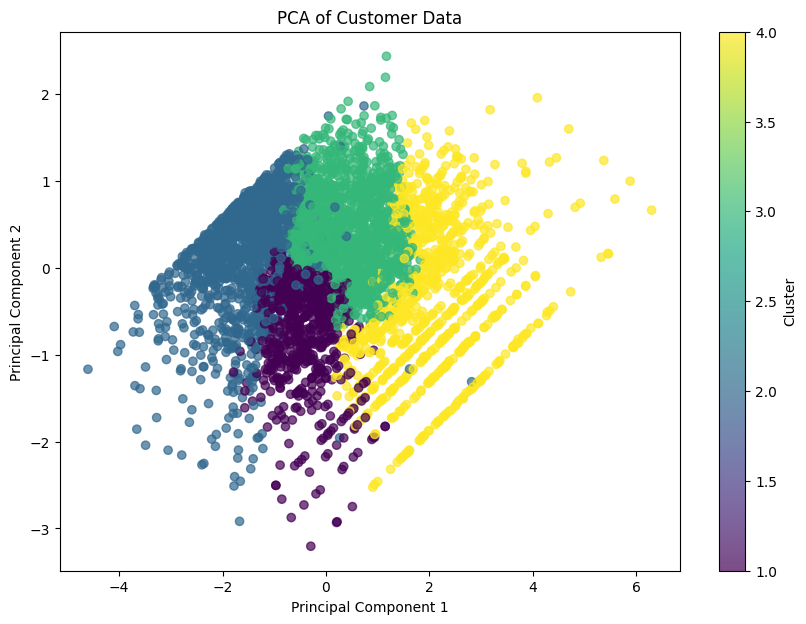

In [12]:
# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(rfm_pca)
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

pca_df = pd.DataFrame(data=pc_df, columns=['PC1', 'PC2'])
pca_df['Cluster'] = labels

plt.figure(figsize=(10, 7))

# Scatter plot of PCA results, colored by cluster
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis', alpha=0.7)

plt.title('PCA of Customer Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster')
plt.show()

In [13]:
#drop the initial cluster
rfm = rfm.drop(['Cluster', 'CustomerID'], axis = 1)
rfm.head()

Recency  Frequency  Monetary
0      325          1  77183.60
1        1        182   4310.00
2       74         31   1797.24
3       18         73   1757.55
4      309         17    334.40

In [14]:
#add the new cluster 
rfm['Cluster'] = labels


In [15]:
rfm.head()

Recency  Frequency  Monetary  Cluster
0      325          1  77183.60        2
1        1        182   4310.00        4
2       74         31   1797.24        3
3       18         73   1757.55        3
4      309         17    334.40        2

In [16]:
pd.pivot_table(rfm, index = 'Cluster', aggfunc= 'mean')

Frequency     Monetary     Recency
Cluster                                     
1         28.074896   386.198531   32.783634
2         16.168783   616.992240  197.653473
3         87.774217  1396.837489   72.472688
4        254.459669  6480.385934   10.259669

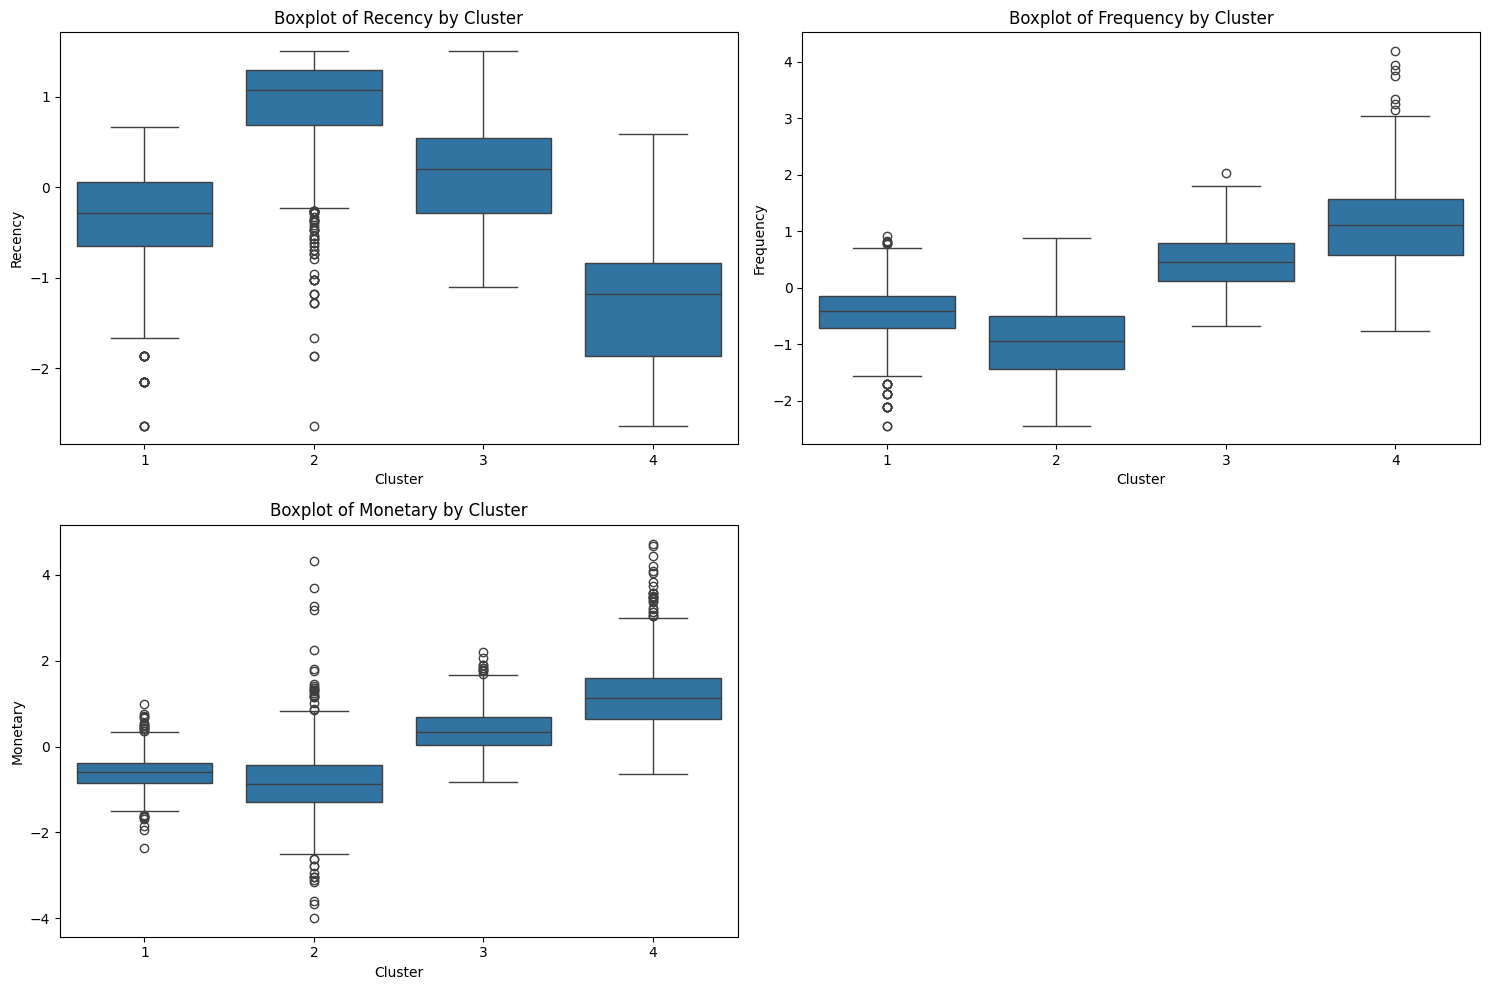

In [17]:
import seaborn as sns

plt.figure(figsize=(15,10))

features = ['Recency', 'Frequency', 'Monetary']

for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x = 'Cluster', y = feature, data = rfm_std)
    plt.title(f'Boxplot of {feature} by Cluster')

plt.tight_layout()
plt.show()

In [20]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
ax = plt.axes(projection = '3d')

#scatter plot 
ax.scatter3D(
    rfm_std['Recency'], 
    rfm_std['Frequency'], 
    rfm_std['Monetary'], 
    c = rfm_std['Cluster'], 
    cmap = 'viridis', 
    s = 20, 
    alpha = 0.3
)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

ax.set_title('3D Scatter Plot of RFM Clusters')

ax.view_init(elev=30) 

plt.show()

In [50]:
percentiles = rfm.groupby('Cluster').quantile([0.25, 0.5, 0.75]).unstack(level=1)
print(percentiles)

        Recency               Frequency               Monetary           \
           0.25   0.50   0.75      0.25   0.50   0.75     0.25     0.50   
Cluster                                                                   
1          16.0   28.0   46.0      16.0   24.0   34.0   245.81   340.11   
2         114.5  200.0  277.0       6.0   12.0   21.5   143.73   243.36   
3          28.0   57.0   94.0      47.0   72.0  111.0   761.74  1122.36   
4           2.0    7.0   12.0      85.0  166.0  296.0  1621.73  3039.17   

                   
             0.75  
Cluster            
1         452.890  
2         417.325  
3        1741.220  
4        5398.300  


In [32]:

# visualizing how each features for each variable 
plt.figure(figsize=(15,10))

features = ['Recency', 'Frequency', 'Monetary']

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x = 'Cluster', y = feature, data = rfm_std)
    plt.title(f'Boxplot of {feature} by Cluster')

plt.tight_layout()
plt.show()

In [52]:
rfm_std

Recency  Frequency  Monetary  Cluster
0     1.409894  -2.438202  3.707716        2
1    -2.146498   1.188986  1.414903        4
2     0.383971  -0.211465  0.720024        3
3    -0.574674   0.461819  0.702287        3
4     1.374758  -0.673554 -0.614514        2
...        ...        ...       ...      ...
4333  1.298690  -1.069075 -1.102093        2
4334  0.999081  -1.324833 -1.735717        2
4335 -1.178605  -0.934910 -1.113332        1
4336 -1.662552   2.291307  0.822812        4
4337 -0.004422   0.428581  0.737526        3

[4338 rows x 4 columns]

In [55]:
silhouette_avg = silhouette_score(rfm_std,labels)

In [56]:
silhouette_avg

0.24661274977693506

rfm.head